Q3 

In [1]:
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

with open('data.pickle', 'rb') as f:
    data_dict = pickle.load(f)

X_train, y_train = zip(*data_dict['train'])
X_test, y_test = zip(*data_dict['test'])

def calculate_bias_variance(y_true, y_preds):
    #print(y_true)
    mean_preds = np.mean(y_preds, axis=0)
    #print(mean_preds)
    bias = np.mean((mean_preds - y_true)**2)
    variance = np.mean((y_preds - mean_preds)**2, axis=0)
    avg_variance = np.mean(variance)
    return bias, avg_variance


for degree in range(1, 11):
    biases = []
    variances = []

    for _ in range(15):  
        X_train_parts, _, y_train_parts, _ = train_test_split(X_train, y_train, test_size=0.9, random_state=None)
        poly = PolynomialFeatures(degree=degree)
        X_train_poly = poly.fit_transform(np.array(X_train_parts).reshape(-1, 1))

        model = LinearRegression().fit(X_train_poly, y_train_parts)


        X_test_poly = poly.transform(np.array(X_test).reshape(-1, 1))
        y_pred = model.predict(X_test_poly)


        variances.append(y_pred)

    bias, avg_variance = calculate_bias_variance(np.array(y_test),np.array(variances))

    print(f"Degree {degree}: Average Bias_square = {bias}, Average Variance = {avg_variance}")


Degree 1: Average Bias_square = 1.0121115311207045, Average Variance = 0.02096779524771001
Degree 2: Average Bias_square = 0.9207641975517941, Average Variance = 0.0915146805135459
Degree 3: Average Bias_square = 0.018896539217965413, Average Variance = 0.05726546024352167
Degree 4: Average Bias_square = 0.02852995748200122, Average Variance = 0.09277734819002639
Degree 5: Average Bias_square = 0.0352572163592824, Average Variance = 0.12592758487765843
Degree 6: Average Bias_square = 0.005800340982834819, Average Variance = 0.10896506538362682
Degree 7: Average Bias_square = 0.022469823493034134, Average Variance = 0.12443242699341539
Degree 8: Average Bias_square = 0.022251730186835773, Average Variance = 0.11178563997149842
Degree 9: Average Bias_square = 0.10901704864792863, Average Variance = 0.12096827870805618
Degree 10: Average Bias_square = 0.2723522739782968, Average Variance = 0.15177016783300082



Q4

In [3]:
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

with open('data.pickle', 'rb') as f:
    data_dict = pickle.load(f)


X_train, y_train = zip(*data_dict['train'])
X_test, y_test = zip(*data_dict['test'])


def calculate_bias_variance_irreducible(y_true, y_preds):
    #print(y_preds)
    mean_preds = np.mean(y_preds, axis=0)
    #print(mean_preds)
    bias = np.mean((mean_preds - y_true)**2)
    variance = np.mean((y_preds - mean_preds)**2, axis=0)
    mse = np.mean((y_preds - y_true)**2,axis=0)
    irreducible_error = (np.mean(mse) - bias - np.mean(variance))
    
    return bias, np.mean(variance), irreducible_error,np.mean(mse)

for degree in range(1, 11):
    biases = []
    variances = []
    irreducible_errors = []

    for _ in range(15):  
        X_train_parts, _, y_train_parts, _ = train_test_split(X_train, y_train, test_size=0.9, random_state=None)

        poly = PolynomialFeatures(degree=degree)
        X_train_poly = poly.fit_transform(np.array(X_train_parts).reshape(-1, 1))


        model = LinearRegression().fit(X_train_poly, y_train_parts)

    
        X_test_poly = poly.transform(np.array(X_test).reshape(-1, 1))
        y_pred = model.predict(X_test_poly)

        variances.append(y_pred)

    bias, avg_variance,irreducible_error, MSE = calculate_bias_variance_irreducible(np.array(y_test),np.array(variances))

    #print(f"Degree {degree}: Average Bias = {bias}, Average Variance = {avg_variance}, Irreducible Error = {irreducible_error}")
    print(f"Bias_squared = {bias}, Variance = {avg_variance}, Irreducible Error = {irreducible_error}, MSE={MSE}")


Bias_squared = 1.0039289756918282, Variance = 0.029783036125854978, Irreducible Error = 1.4432899320127035e-15, MSE=1.0337120118176846
Bias_squared = 0.9423364833366144, Variance = 0.05097792573144457, Irreducible Error = 6.453171330633722e-16, MSE=0.9933144090680596
Bias_squared = 0.014054221227463392, Variance = 0.0575798518317102, Irreducible Error = 4.85722573273506e-17, MSE=0.07163407305917364
Bias_squared = 0.017986242217133172, Variance = 0.07388139871644124, Irreducible Error = 5.551115123125783e-17, MSE=0.09186764093357447
Bias_squared = 0.012426867306715383, Variance = 0.12410523616576981, Irreducible Error = 1.3877787807814457e-17, MSE=0.1365321034724852
Bias_squared = 0.03029049894069814, Variance = 0.12162555797861636, Irreducible Error = -1.1102230246251565e-16, MSE=0.1519160569193144
Bias_squared = 0.026003452425566016, Variance = 0.18070993208072314, Irreducible Error = -5.551115123125783e-17, MSE=0.2067133845062891
Bias_squared = 0.03543315819949712, Variance = 0.15549

Q5

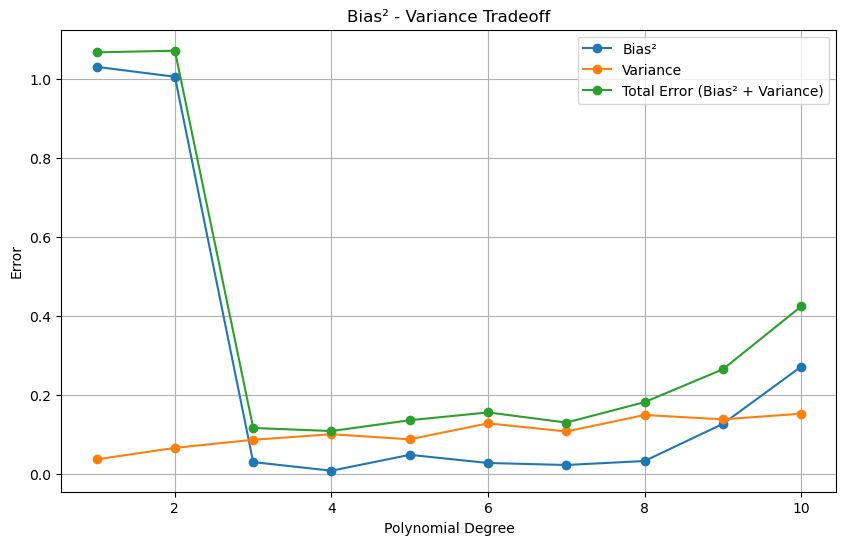

In [3]:
import matplotlib.pyplot as plt


degrees = range(1, 11)
bias_squared_values = [1.0305094139424145, 1.0054851778789282, 0.029934264887733965, 0.008051728738250233, 0.04829573347303252, 0.027633794085691145, 0.022561588129382585, 0.03265682954816777, 0.1267062283440447, 0.2715483900131767]
variance_values = [0.036743532970792324, 0.06588778113102998, 0.08639002669098342, 0.10043155058152656, 0.08760437241215632, 0.12803156062355578, 0.10737688881776628, 0.14907867548157866, 0.13815210701132746, 0.15241646655497015]


total_error_values = [bias_sq + var for bias_sq, var in zip(bias_squared_values, variance_values)]

plt.figure(figsize=(10, 6))
plt.plot(degrees, bias_squared_values, label='Bias²', marker='o')
plt.plot(degrees, variance_values, label='Variance', marker='o')
plt.plot(degrees, total_error_values, label='Total Error (Bias² + Variance)', marker='o')

plt.title('Bias² - Variance Tradeoff')
plt.xlabel('Polynomial Degree')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()
